# Date : 31-01-2026

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree


In [25]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Reading the dataset
- Breast Cancer Dataset

In [26]:
breast_cancer_dataset = pd.read_csv("/content/drive/MyDrive/DM/datasets/wdbc.csv",index_col='ID')
breast_cancer_dataset.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractcal_dimension3
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Information about the dataset

In [27]:
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Diagnosis            569 non-null    object 
 1   radius1              569 non-null    float64
 2   texture1             569 non-null    float64
 3   perimeter1           569 non-null    float64
 4   area1                569 non-null    float64
 5   smoothness1          569 non-null    float64
 6   compactness1         569 non-null    float64
 7   concavity1           569 non-null    float64
 8   concave_points1      569 non-null    float64
 9   symmetry1            569 non-null    float64
 10  fractal_dimensions1  569 non-null    float64
 11  radius2              569 non-null    float64
 12  texture2             569 non-null    float64
 13  perimeter2           569 non-null    float64
 14  area2                569 non-null    float64
 15  smoothness2          569 non-null    f

# Separting features from target variable

In [28]:
X_cols = breast_cancer_dataset.columns[breast_cancer_dataset.columns != 'Diagnosis']
X = breast_cancer_dataset.loc[:,X_cols].copy()

X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimensions1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractcal_dimension3
ID,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
y_col = 'Diagnosis'
y = breast_cancer_dataset.loc[:,y_col].copy()

y.head()

,Diagnosis
ID,
842302,M
842517,M
84300903,M
84348301,M
84358402,M


# Distribution of target variable

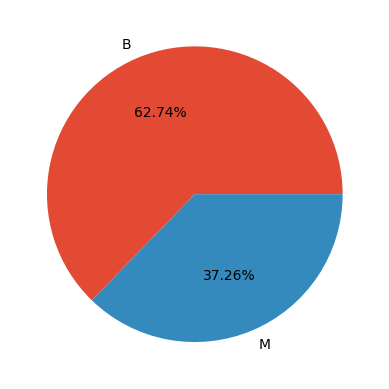

In [30]:
plt.style.use("ggplot")
plt.pie(y.value_counts(normalize=True),autopct="%.2f%%",labels=y.value_counts().index)
plt.show()

# Encoding the target variale

In [31]:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
y_index = y.index
y = pd.Series(y_enc)
y.index = y_index

y.head()

,0
ID,
842302,1
842517,1
84300903,1
84348301,1
84358402,1


# Distribution of features

In [32]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimensions1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractcal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Splitting into training and test datasets

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

x_feat_names = x_train.columns
scaler = StandardScaler()
x_train_fit = scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_train.columns = x_feat_names

x_train.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimensions1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractcal_dimension3
0,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,0.094251,...,-1.043176,0.213533,-1.036045,-0.848808,0.342499,-0.730097,-0.812321,-0.757984,-0.016148,-0.385034
1,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,-0.425471,...,-0.715654,1.066842,-0.689922,-0.668697,-0.095537,-0.537866,-0.375048,-0.606870,0.096690,-0.386158
2,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,-0.575221,...,0.297615,-0.977818,0.262137,0.113888,-0.524724,-0.520866,-0.182989,-0.023719,-0.200502,-0.751443
3,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,0.540567,...,-0.701325,-0.757927,-0.735737,-0.658966,-0.816748,-1.034921,-1.091633,-0.852545,-1.076186,-0.546883
4,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,-0.426939,...,-0.427026,1.058637,-0.422423,-0.440955,-0.303494,-0.467251,-0.724565,-0.783118,0.311240,-0.082129


# Correcting the class imbalance

In [34]:
sampler = RandomOverSampler()
x_train,y_train = sampler.fit_resample(x_train,y_train)

x_train = pd.DataFrame(x_train)
x_train.columns = x_feat_names

y_train = pd.Series(y_train)


# Decision Tree Model

In [35]:
decision_tree = DecisionTreeClassifier()
model = decision_tree.fit(x_train,y_train)
x_test = pd.DataFrame(scaler.transform(x_test))
x_test.columns = x_feat_names
y_pred = decision_tree.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

# Confusion Matrix

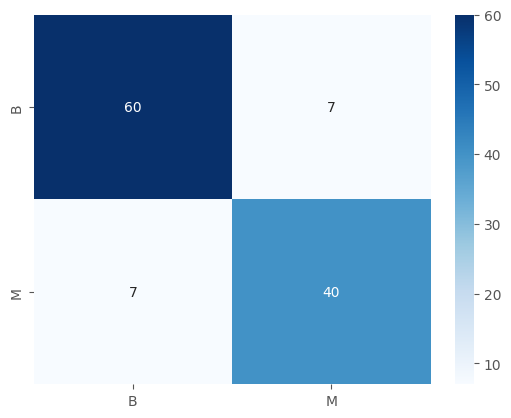

In [39]:
conf_matrix = confusion_matrix(y_pred=y_pred,y_true=y_test)
sns.heatmap(conf_matrix,annot=True,cmap=plt.cm.Blues,xticklabels=['B','M'],yticklabels=['B','M'])
plt.show()

# Classification Report

In [37]:
report = classification_report(y_pred=y_pred,y_true=y_test,output_dict=True)
report = pd.DataFrame(report)
report

,0,1,accuracy,macro avg,weighted avg
precision,0.895522,0.851064,0.877193,0.873293,0.877193
recall,0.895522,0.851064,0.877193,0.873293,0.877193
f1-score,0.895522,0.851064,0.877193,0.873293,0.877193
support,67.000000,47.000000,0.877193,114.000000,114.000000


# Visualization of the Decision Tree

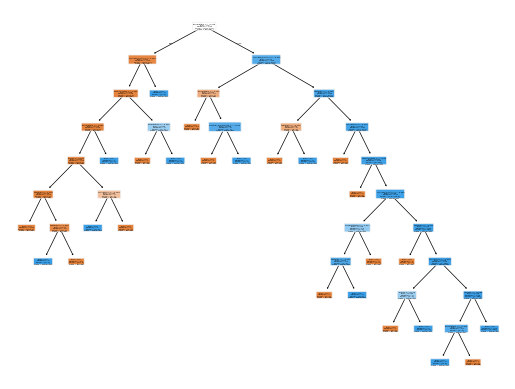

In [38]:
plot_tree(decision_tree,feature_names=x_feat_names,class_names=['Benign','Malignant'],rounded=True,filled=True)
plt.show()